In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
nation = pd.read_csv("./dataset/detection-faddiness-exam-score/nation.csv")
nation.head()

,indexid,numid,math,viet,english,physics,chemistry,biology,history,geography,gdcd,groupa,groupb,groupc,groupd,groupa1
0,1,10000001,4.2,7.25,7.2,NaN,NaN,NaN,3.50,7.5,7.25,NaN,NaN,18.25,18.65,NaN
1,2,10000002,6.4,5.00,5.2,6.25,7.00,8.0,NaN,NaN,NaN,19.65,21.40,NaN,16.6,17.85
2,3,10000003,5.8,6.00,6.2,5.50,5.75,4.5,NaN,NaN,NaN,17.05,16.05,NaN,18,17.50
3,4,10000004,5.2,7.50,4.4,NaN,NaN,NaN,3.75,6.5,7.25,NaN,NaN,17.75,17.1,NaN
4,5,10000005,7.2,8.25,8.0,NaN,NaN,NaN,2.50,7.5,9.25,NaN,NaN,18.25,23.45,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d6fb8d0>,
      dtype=object)

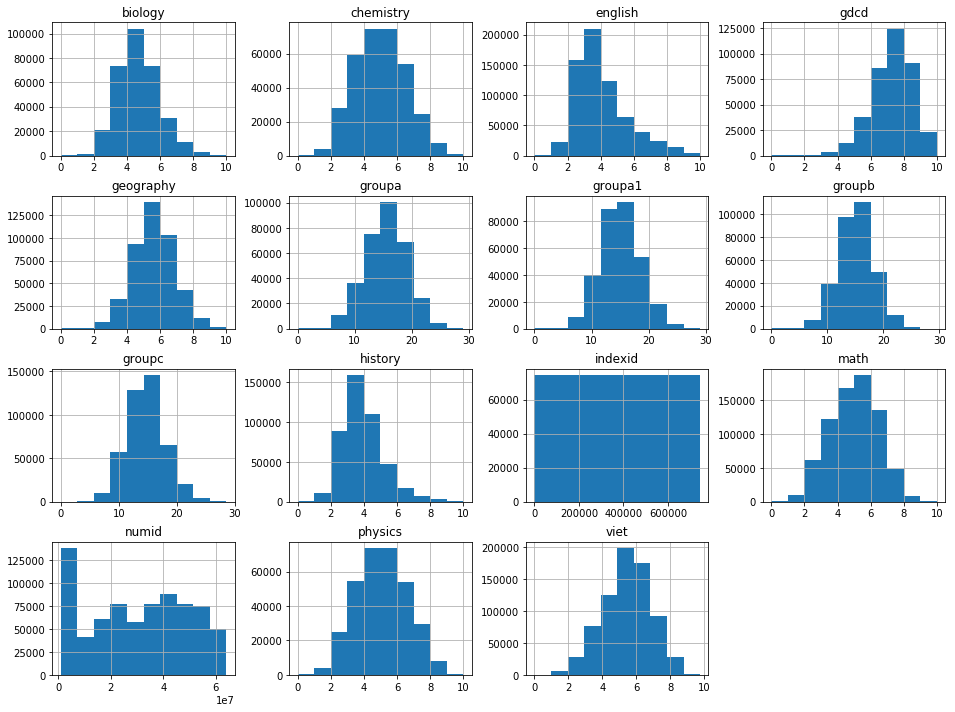

In [3]:
nation.hist(bins=10, grid=True, figsize=(16, 12), zorder=1, rwidth=1)

In [4]:
hg_data = nation[
    nation["numid"].astype(str).str.contains("^5\d{6}$", regex=True, case=False)
]
hg_data.head()

,indexid,numid,math,viet,english,physics,chemistry,biology,history,geography,gdcd,groupa,groupb,groupc,groupd,groupa1
719657,719658,5000001,5.8,6.00,4.2,7.00,6.25,3.75,NaN,NaN,NaN,19.05,15.80,NaN,16,17.00
719658,719659,5000005,8.8,6.50,5.0,8.75,9.00,3.75,NaN,NaN,NaN,26.55,21.55,NaN,20.3,22.55
719659,719660,5000007,9.4,8.00,6.2,NaN,NaN,NaN,9.5,3.25,2.75,NaN,NaN,20.75,23.6,NaN
719660,719661,5000008,6.6,7.50,4.6,5.50,7.25,5.50,NaN,NaN,NaN,19.35,19.35,NaN,18.7,16.70
719661,719662,5000010,9.6,6.25,9.6,9.75,3.75,2.25,NaN,NaN,NaN,23.10,15.60,NaN,25.45,28.95


In [5]:
hg_data.describe()

,indexid,numid,math,viet,english,physics,chemistry,biology,history,geography,gdcd,groupa,groupb,groupc,groupa1
count,3099.000000,3.099000e+03,3089.000000,3045.000000,2889.000000,594.000000,591.000000,570.000000,2734.000000,2683.000000,2539.000000,581.000000,570.000000,2676.000000,574.000000
mean,721207.000000,5.002812e+06,3.494335,4.388424,2.967740,4.228956,4.141709,4.033772,3.445684,4.734719,6.151831,13.086833,12.880526,12.491499,12.396864
std,894.748568,1.467318e+03,1.433978,1.586289,1.102131,2.067266,1.853110,1.253054,1.106323,1.353473,1.459979,5.278612,3.837414,3.265845,5.076493
min,719658.000000,5.000001e+06,1.000000,0.500000,0.600000,1.000000,0.750000,1.250000,0.750000,0.000000,1.000000,4.750000,5.250000,3.500000,5.450000
25%,720432.500000,5.001696e+06,2.600000,3.250000,2.400000,2.750000,2.750000,3.250000,2.750000,3.750000,5.250000,8.850000,9.612500,10.250000,8.562500
50%,721207.000000,5.002839e+06,3.200000,4.250000,2.800000,3.750000,3.750000,4.000000,3.250000,4.750000,6.250000,12.000000,12.575000,12.250000,11.175000
75%,721981.500000,5.003972e+06,4.200000,5.500000,3.400000,5.250000,5.250000,4.750000,4.000000,5.750000,7.250000,16.300000,15.587500,14.500000,14.950000
max,722756.000000,5.005492e+06,9.600000,9.000000,10.000000,9.750000,9.750000,9.500000,9.750000,9.000000,9.750000,28.450000,28.000000,26.500000,28.950000


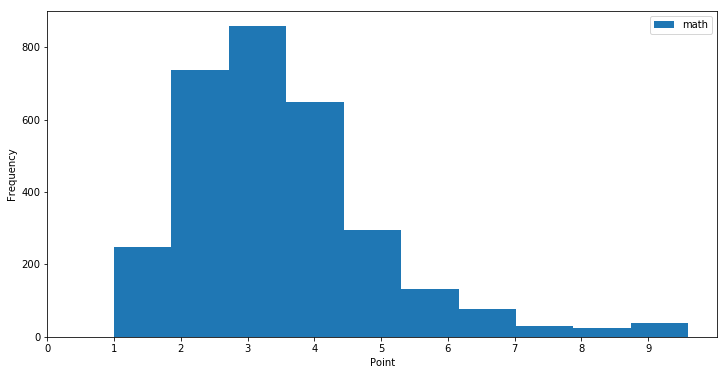

In [6]:
hg_math = hg_data["math"]
hg_lit = hg_data["viet"]
hg_phys = hg_data["physics"]
hg_chem = hg_data["chemistry"]
hg_bio = hg_data["biology"]
hg_his = hg_data["history"]
hg_geo = hg_data["geography"]
hg_edu = hg_data["gdcd"]
hg_eng = hg_data["english"]

nation_math = nation["math"]
nation_lit = nation["viet"]
nation_phys = nation["physics"]
nation_chem = nation["chemistry"]
nation_bio = nation["biology"]
nation_his = nation["history"]
nation_geo = nation["geography"]
nation_edu = nation["gdcd"]
nation_eng = nation["english"]

plt.subplots(figsize=(12, 6))
legend = ["math"]
plt.hist([hg_math])
plt.xlabel("Point")
plt.ylabel("Frequency")
plt.legend(legend)
plt.xticks(range(0, 10))
plt.show()

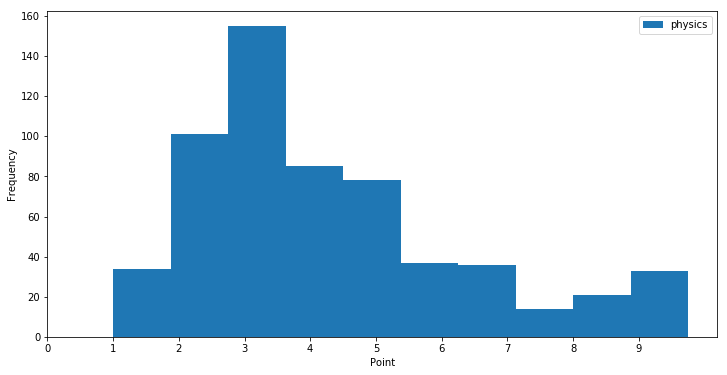

In [7]:
plt.subplots(figsize=(12, 6))
legend = ["physics"]
plt.hist([hg_phys])
plt.xlabel("Point")
plt.ylabel("Frequency")
plt.legend(legend)
plt.xticks(range(0, 10))
plt.show()

In [8]:
hg_data_sub = hg_data[["math", "physics", "chemistry", "biology"]].dropna()
hg_data_sub.head()

,math,physics,chemistry,biology
719657,5.8,7.00,6.25,3.75
719658,8.8,8.75,9.00,3.75
719660,6.6,5.50,7.25,5.50
719661,9.6,9.75,3.75,2.25
719662,4.4,2.25,3.00,5.25


In [9]:
hg_data_sub.shape

(560, 4)

In [10]:
hg_data_sub.describe()

,math,physics,chemistry,biology
count,560.000000,560.000000,560.000000,560.00000
mean,4.737143,4.178571,4.090179,4.00625
std,1.967949,2.002634,1.783043,1.23328
min,1.000000,1.000000,1.000000,1.25000
25%,3.200000,2.750000,2.750000,3.25000
50%,4.600000,3.750000,3.750000,4.00000
75%,6.000000,5.000000,5.250000,4.75000
max,9.600000,9.750000,9.750000,9.50000


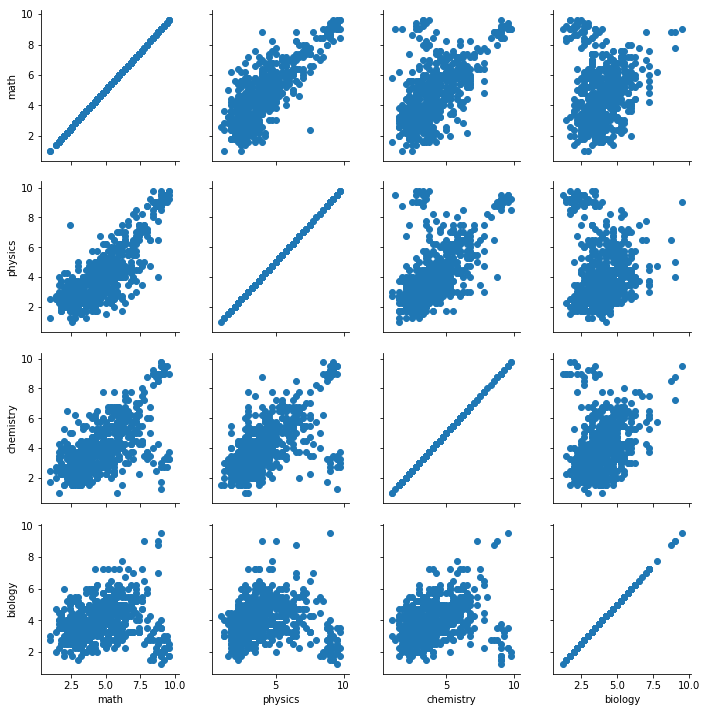

In [11]:
sns.PairGrid(hg_data_sub).map(plt.scatter)

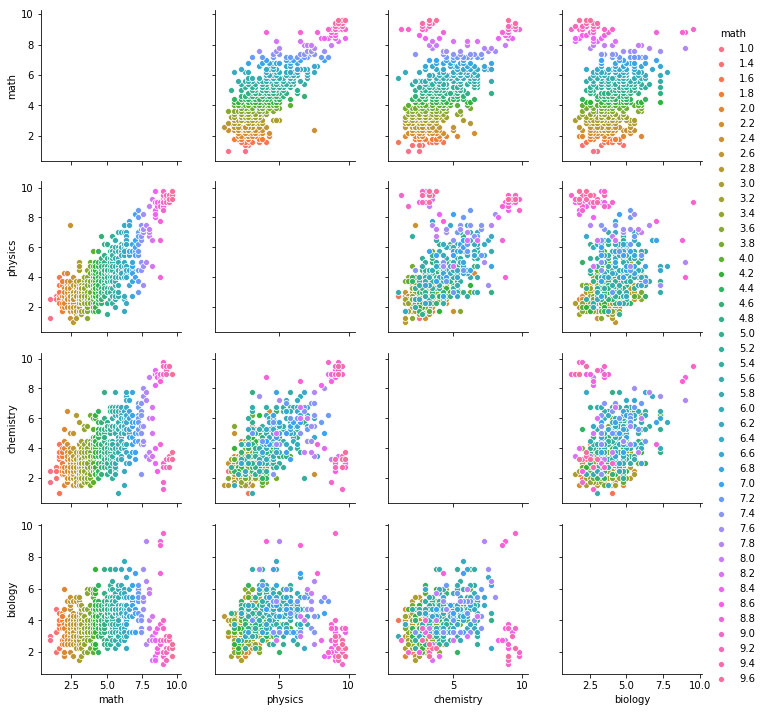

In [12]:
sns.pairplot(hg_data_sub, hue="math", diag_kind="reg")

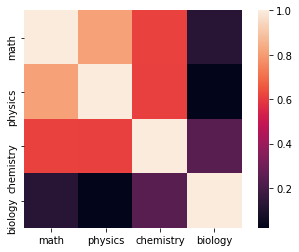

In [13]:
cor = hg_data_sub.corr()
sns.heatmap(cor, square=True)

In [14]:
pca_reducer = PCA(n_components=2)
reduced_hg_data_sub = pca_reducer.fit_transform(hg_data_sub)
reduced_hg_data_sub.shape

(560, 2)

In [15]:
import math


def optimal_number_of_clusters(dataset):
    nc = range(1, 20)
    kmeans = [KMeans(n_clusters=i) for i in nc]
    score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
    plt.plot(nc, score)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Score")
    plt.title("Elbow Curve")
    plt.show()

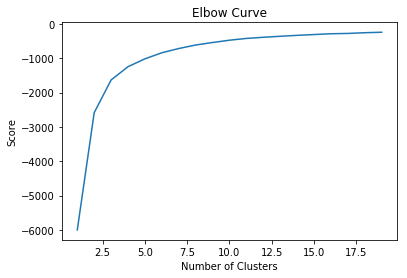

In [16]:
optimal_number_of_clusters(reduced_hg_data_sub)

In [17]:
cluster = KMeans(n_clusters=5).fit(reduced_hg_data_sub)

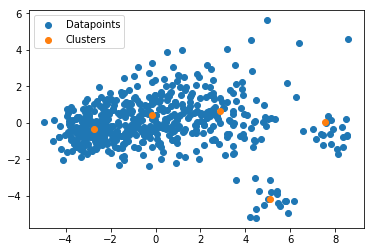

In [18]:
plt.scatter(reduced_hg_data_sub[:, 0], reduced_hg_data_sub[:, 1], label="Datapoints")
plt.scatter(
    cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label="Clusters"
)
plt.legend()
plt.show()

In [19]:
hg_data_sub["cluster"] = cluster.labels_

In [20]:
hg_data_sub.head()

,math,physics,chemistry,biology,cluster
719657,5.8,7.00,6.25,3.75,0
719658,8.8,8.75,9.00,3.75,3
719660,6.6,5.50,7.25,5.50,0
719661,9.6,9.75,3.75,2.25,4
719662,4.4,2.25,3.00,5.25,1


In [21]:
hg_data_sub[hg_data_sub["cluster"] == 0].mean()

math         6.433613
physics      5.756303
chemistry    5.697479
biology      4.779412
cluster      0.000000
dtype: float64

In [22]:
hg_data_sub[hg_data_sub["cluster"] == 1].mean()

math         2.989908
physics      2.608945
chemistry    2.696101
biology      3.469037
cluster      1.000000
dtype: float64

In [23]:
hg_data_sub[hg_data_sub["cluster"] == 2].mean()

math         4.739665
physics      3.871508
chemistry    4.132682
biology      4.389665
cluster      2.000000
dtype: float64

In [24]:
hg_data_sub[hg_data_sub["cluster"] == 3].mean()

math         8.700000
physics      8.778846
chemistry    8.875000
biology      3.336538
cluster      3.000000
dtype: float64

In [25]:
hg_data_sub[hg_data_sub["cluster"] == 4].mean()

math         8.933333
physics      9.166667
chemistry    3.013889
biology      2.555556
cluster      4.000000
dtype: float64

In [26]:
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["math"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["chemistry"].min(),
)
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["math"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["physics"].min(),
)
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["math"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["biology"].min(),
)

9.6 1.25
9.6 7.5
9.6 1.5


In [27]:
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["physics"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["chemistry"].min(),
)
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["physics"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["math"].min(),
)
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["physics"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["biology"].min(),
)

9.75 1.25
9.75 7.8
9.75 1.5


In [28]:
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["chemistry"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["physics"].min(),
)
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["chemistry"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["math"].min(),
)
print(
    hg_data_sub[hg_data_sub["cluster"] == 4]["chemistry"].max(),
    hg_data_sub[hg_data_sub["cluster"] == 4]["biology"].min(),
)

4.0 7.5
4.0 7.8
4.0 1.5


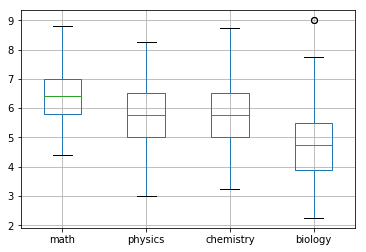

In [29]:
boxplot_0 = hg_data_sub[hg_data_sub["cluster"] == 0].boxplot(
    column=["math", "physics", "chemistry", "biology"]
)

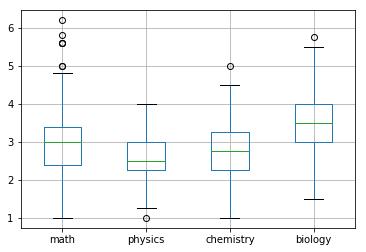

In [30]:
boxplot_1 = hg_data_sub[hg_data_sub["cluster"] == 1].boxplot(
    column=["math", "physics", "chemistry", "biology"]
)

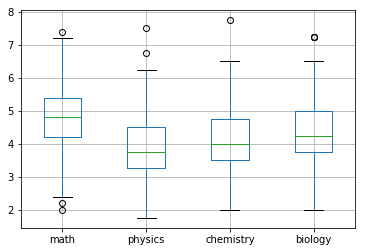

In [31]:
boxplot_2 = hg_data_sub[hg_data_sub["cluster"] == 2].boxplot(
    column=["math", "physics", "chemistry", "biology"]
)

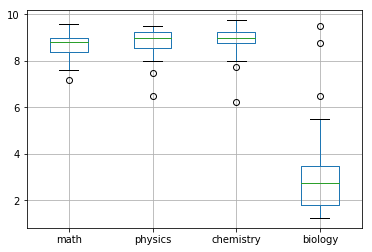

In [32]:
boxplot_3 = hg_data_sub[hg_data_sub["cluster"] == 3].boxplot(
    column=["math", "physics", "chemistry", "biology"]
)

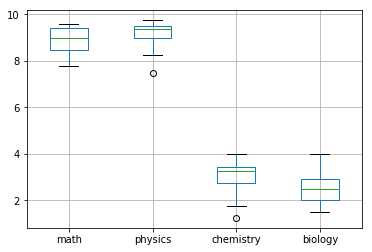

In [33]:
boxplot_4 = hg_data_sub[hg_data_sub["cluster"] == 4].boxplot(
    column=["math", "physics", "chemistry", "biology"]
)